In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [299, 299]

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train'
test_path = '/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train/*')
len(folders)

15

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
#model.summary()

In [ ]:
from keras import optimizers


sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train',
                                                 target_size = (299, 299),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

Found 960 images belonging to 15 classes.


In [ ]:
train_set.class_indices

{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/test',
                                            target_size = (299, 299),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 165 images belonging to 15 classes.


In [ ]:
test_set.class_indices

{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

In [ ]:
'''
leaf1:Ulmus carpinifolia
leaf2:Acer
leaf3:Salix aurita
leaf4:Quercus
leaf5:Alnus incana
leaf6:Betula pubescens
leaf7:Salix alba
leaf8:Populus tremula
leaf9:Ulmus glabra
leaf10:Sorbus aucuparia
leaf11:Salix sinerea
leaf12:Populus
leaf13:Tilia
leaf14:Sorbus intermedia
leaf15:Fagus silvatica
'''

'\nleaf1:Ulmus carpinifolia\nleaf2:Acer\nleaf3:Salix aurita\nleaf4:Quercus\nleaf5:Alnus incana\nleaf6:Betula pubescens\nleaf7:Salix alba\nleaf8:Populus tremula\nleaf9:Ulmus glabra\nleaf10:Sorbus aucuparia\nleaf11:Salix sinerea\nleaf12:Populus\nleaf13:Tilia\nleaf14:Sorbus intermedia\nleaf15:Fagus silvatica\n'

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

#lr_scheduler = LearningRateScheduler(lr_schedule)

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                               cooldown=0,
#                               patience=5,
#                               min_lr=0.5e-6)

#num_epochs = 1000
#num_batch_size = 32

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/FinalYear_Project/swedish_model/VGGleafmodel.h5', 
                               verbose=1, save_best_only=True)

callbacks= [checkpoint]


start = datetime.now()

history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10, callbacks=[callbacks])


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
192/192 [==============================] - 1139s 6s/step - loss: 1713.2225 - accuracy: 0.5367 - val_loss: 1230.3363 - val_accuracy: 0.7697

Epoch 00001: val_loss improved from inf to 1230.33630, saving model to /content/drive/MyDrive/FinalYear_Project/swedish_model/VGGleafmodel.h5
Epoch 2/10
192/192 [==============================] - 1035s 5s/step - loss: 947.0713 - accuracy: 0.8246 - val_loss: 703.4253 - val_accuracy: 0.8909

Epoch 00002: val_loss improved from 1230.33630 to 703.42529, saving model to /content/drive/MyDrive/FinalYear_Project/swedish_model/VGGleafmodel.h5
Epoch 3/10
192/192 [==============================] - 1034s 5s/step - loss: 493.3161 - accuracy: 0.9110 - val_loss: 831.8018 - val_accuracy: 0.8788

Epoch 00003: val_loss did not improve from 703.42529
Epoch 4/10
192/192 [==============================] - 1055s 6s/step - loss: 236.1041 - accuracy: 0.9413 - val_loss: 448.3954 - val_accuracy: 0.9152

Epoch 00004: val_loss improved from 703.42529 to 448.39536,

In [ ]:
test_loss,test_acc = model.evaluate(test_set,verbose=2)
print('Test Accuracy : ',test_acc)


33/33 - 150s - loss: 169.5148 - accuracy: 0.9455
Test Accuracy :  0.9454545378684998


In [ ]:
import tensorflow as tf

In [ ]:
def plot_model(model):
    return tf.keras.utils.plot_model(
        model=model,
        to_file='/content/drive/MyDrive/FinalYear_Project/Results/Vggmodel.png',
        show_shapes=True,
        show_layer_names=False,
        rankdir='TB',
        expand_nested=True,
        dpi=96
    )

In [ ]:
def plot_model_hist(history):
    plt.figure(figsize=(20, 6))
    plt.title('Results')

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], color='orange', label='Training loss')
    plt.plot(history.history['val_loss'], color='red', label='Validation loss')
    plt.legend()
    plt.title(label='Loss')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss Value')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], color='green', label='Validation accuracy')
    plt.legend();
    plt.title(label='Accuracy')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy Value')

    plt.savefig(fname='/content/drive/MyDrive/FinalYear_Project/Results/Vggmodel_history.png', orientation='landscape')

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)       0   

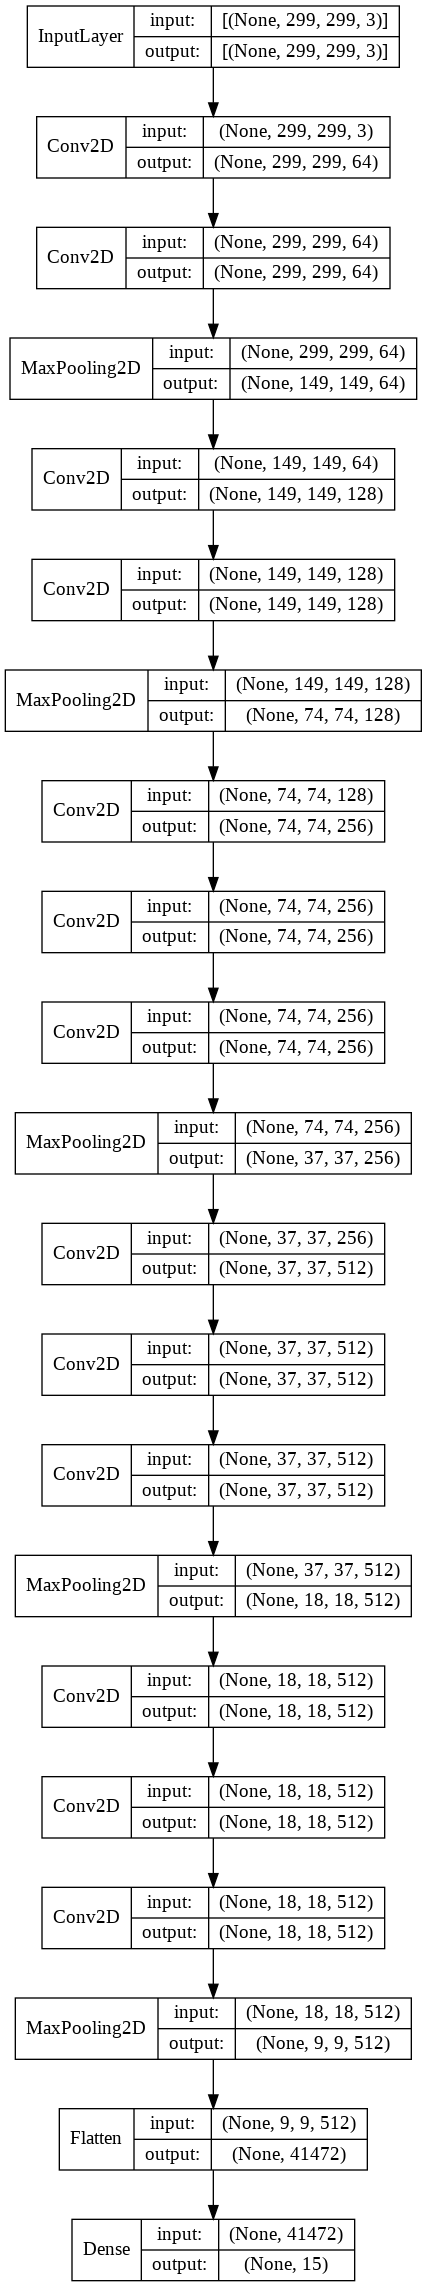

In [ ]:
plot_model(model=model)

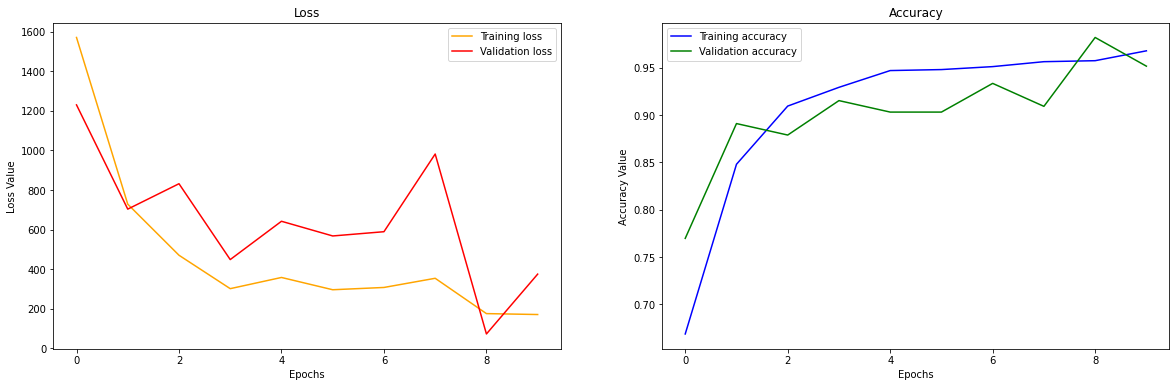

In [ ]:
plot_model_hist(history=history)

Copy of l10nr065.tif


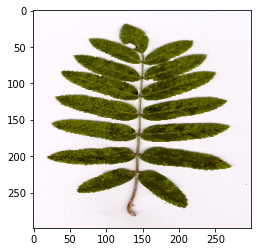

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Copy of l11nr071.tif


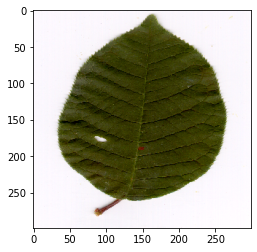

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Copy of l13nr065.tif


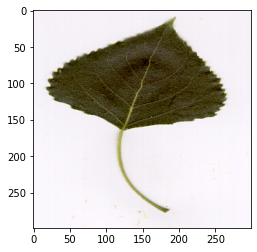

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Copy of l4nr070.tif


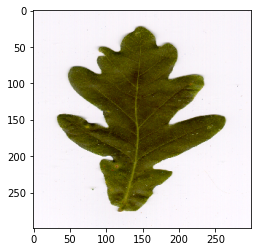

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l6nr070.tif


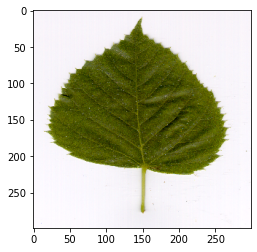

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import cv2
import os
import numpy as np

dir_path = '/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/val'
##Predicting with model
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/Resnet.h5')

for i in os.listdir(dir_path):
   img =  image.load_img(dir_path+'/'+i,target_size=(299,299))
   print(i)
   plt.imshow(img)
   plt.show()
   X = image.img_to_array(img)
   X = np.expand_dims(X,axis=0)
   images = np.vstack([X])
   val = model.predict(images)
   print(val)


In [ ]:
#Code to generate Confusion Matrix
import pandas as pd
import seaborn as sn
import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/cnnModel.h5')
filenames = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []
test_set.reset()

for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)
  y_pred1 = model.predict(X_test)
  arr = np.zeros((15))
  y_pred1 = np.argmax(y_pred1,axis=1)
  arr[y_pred1] = 1
  arr = np.reshape(arr, (1,-1)) 


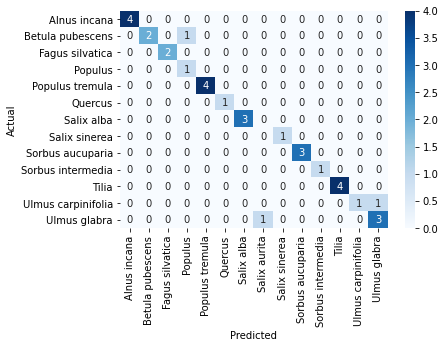

Predicted           Alnus incana  ...  Ulmus glabra
Actual                            ...              
Alnus incana                   4  ...             0
Betula pubescens               0  ...             0
Fagus silvatica                0  ...             0
Populus                        0  ...             0
Populus tremula                0  ...             0
Quercus                        0  ...             0
Salix alba                     0  ...             0
Salix sinerea                  0  ...             0
Sorbus aucuparia               0  ...             0
Sorbus intermedia              0  ...             0
Tilia                          0  ...             0
Ulmus carpinifolia             0  ...             1
Ulmus glabra                   0  ...             3

[13 rows x 14 columns]


In [ ]:
#Generating ConfusionMatrix

predicted_class = [list(test_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(test_set.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()

#print('Test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))
#print(predicted_class)
#print(actual_class)
print(confusion_matrix)

